# Linear Regression

### Generating a linear Data

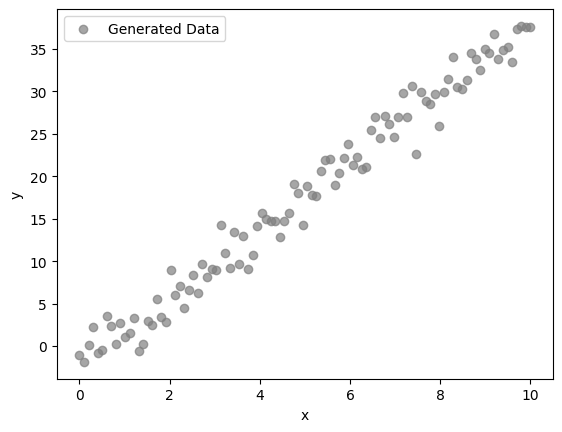

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

np.random.seed(42)

X = np.linspace(0, 10, 100)  
noise = np.random.normal(0, 2, size=X.shape) 
y = 4 * X - 2 + noise

# Plot the data
plt.scatter(X, y, label="Generated Data", color="gray", alpha=0.7)
plt.xlabel("x")
plt.ylabel("y")
plt.legend() 
plt.show()


In [2]:
X.shape 

(100,)

In [3]:
X = X.reshape(-1,1)

In [4]:
y = y.reshape(-1,1)

In [5]:
X.shape 

(100, 1)

### Splitting data into train and test

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
len(X)

100

### Creating accuracy function that takes X , y and W


In [8]:
def accuracy(X , y , W):
    X = np.hstack((X,np.ones((X.shape[0], 1))))
    predictions = X.dot(W)
    mse = mean_squared_error(y, predictions)
    return predictions , mse
    

### Creating BGD function for linear regression

In [9]:
def BGD(X, y, num_iterations = 1000 ):
    X = np.hstack((X,np.ones((X.shape[0], 1))))
    alpha = 0.001
    W = np.random.randn(X.shape[1], 1)
    for i in range(num_iterations) :    
        yhat = X.dot(W)
        error = yhat - y
        gradient = X.T.dot(error) / len(X)
        W = W - alpha * gradient 
    return W             

In [10]:
W_BGD = BGD(X_train, y_train )
BGD_predictions , loss = accuracy(X_test, y_test,W_BGD)
print(loss)

3.7077121656339997


### Creating SGD function for linear regression

In [11]:
def SGD(X, y, num_iterations = 1000 ):
    alpha = 0.001
    X = np.hstack((X,np.ones((X.shape[0], 1))))
    W = np.random.randn(X.shape[1], 1)
    for i in range(num_iterations) :   
        for j in range(len(X)): 
            yhat = X[j].dot(W)
            error = yhat - y[j]
            gradient = X[j].reshape(-1,1) * error 
            W = W - alpha * gradient 
    return W             

In [12]:
W_SGD = SGD(X_train, y_train)
SGD_predictions , loss = accuracy(X_test, y_test , W_SGD)
print(loss)

2.4707585875172517


### Creating MBGD function for linear regression

In [13]:
def MBGD(X, y, num_iterations=1000, batch_size=32, alpha=0.001):
    X = np.hstack((X,np.ones((X.shape[0], 1))))
    W = np.random.randn(X.shape[1], 1)
    for i in range(num_iterations):
            
            for j in range(0, len(X), batch_size):  
                X_batch = X[j:j + batch_size]  
                y_batch = y[j:j + batch_size] 
                
                yhat = X_batch.dot(W)  
                error = yhat - y_batch  
            
                gradient = X_batch.T.dot(error) / batch_size  
                
                
                W = W - alpha * gradient  

    return W 

In [14]:
W_MBGD = MBGD(X_train, y_train)
MBGD_predictions , loss = accuracy(X_test, y_test,W_MBGD)
print(loss)

3.3812700647770377


### Evaluating Sklearn's Linear Regression performance

In [15]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
sklearn_predictions = model.predict(X_test)
mse = mean_squared_error(y_test, sklearn_predictions)
print(mse)

2.488168969160711


### Plotting the four linear regression models

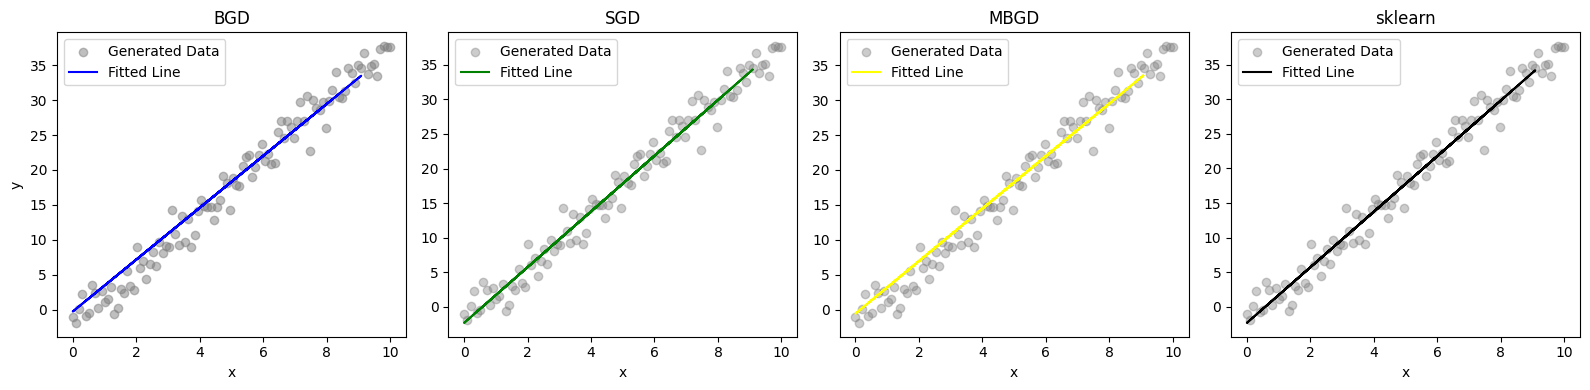

In [16]:
fig, axes = plt.subplots(1, 4, figsize=(16, 4))  
# First Plot
axes[0].scatter(X, y, label="Generated Data", color="gray", alpha=0.5)
axes[0].plot(X_test, BGD_predictions, label="Fitted Line", color="blue")
axes[0].set_xlabel("x")
axes[0].set_ylabel("y")
axes[0].legend()
axes[0].set_title("BGD")

# Second Plot
axes[1].scatter(X, y, label="Generated Data", color="gray", alpha=0.4)
axes[1].plot(X_test, SGD_predictions, label="Fitted Line", color="green")
axes[1].set_xlabel("x")
axes[1].legend()
axes[1].set_title("SGD")

# Third Plot
axes[2].scatter(X, y, label="Generated Data", color="gray", alpha=0.4)
axes[2].plot(X_test, MBGD_predictions, label="Fitted Line", color="yellow")
axes[2].set_xlabel("x")
axes[2].legend()
axes[2].set_title("MBGD")

# Fourth Plot
axes[3].scatter(X, y, label="Generated Data", color="gray", alpha=0.4)
axes[3].plot(X_test, sklearn_predictions, label="Fitted Line", color="black")
axes[3].set_xlabel("x")
axes[3].legend()
axes[3].set_title("sklearn")

# Adjust layout
plt.tight_layout()
plt.show()

# LOGISTIC REGRESSION

### Creating Binary classification data of two features

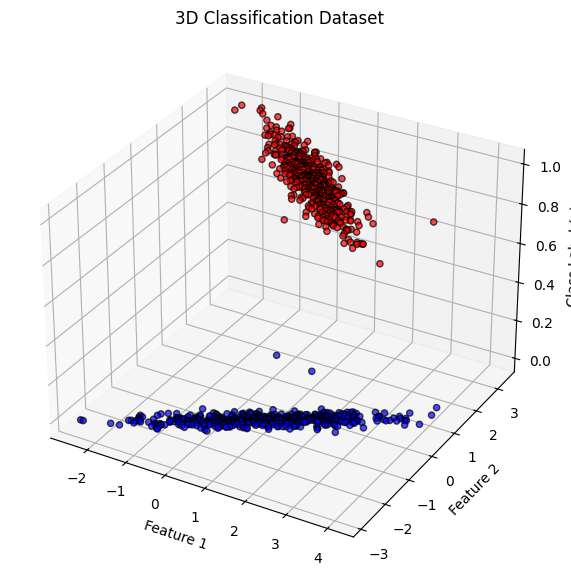

In [17]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Generate dataset
X_class, y_class = make_classification(n_samples=1000,  
                           n_features=2,  
                           n_informative=2,  
                           n_redundant=0,  
                           n_clusters_per_class=1,  
                           random_state=42)

# Create a 3D figure
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with color based on labels
ax.scatter(X_class[:, 0], X_class[:, 1], y_class, c=y_class, cmap="bwr", edgecolors="k", alpha=0.7)

# Labels and title
ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
ax.set_zlabel("Class Label (y)")
ax.set_title("3D Classification Dataset")

# Show the plot
plt.show()


In [18]:
unique, counts = np.unique(y_class, return_counts=True)
print(dict(zip(unique, counts)))

{0: 501, 1: 499}


In [19]:
y_class = y_class.reshape(len(y_class) , -1)

In [20]:
y_class.shape

(1000, 1)

### Splitting data into train and test

In [21]:
X_ctrain , X_ctest , y_ctrain , y_ctest = train_test_split(X_class, y_class , test_size=0.2 , random_state=42)

### Creating Sigmoid function for loagistic regression

In [22]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

### Creating accuracy function for the Classification model

In [23]:
def classification_accuracy(X, y, W):
    X = np.hstack((X, np.ones((X.shape[0], 1))))  
    probabilities = sigmoid(X.dot(W))
    predictions = np.where(probabilities >= 0.5, 1, 0)  
    acc = np.mean(predictions == y)  
    return predictions , acc

### Creating BGD function for logistic regression

In [24]:
def classification_BGD(X, y, num_iterations=100000, alpha=0.001):
    X = np.hstack((X, np.ones((X.shape[0], 1))))  
    W = np.random.randn(X.shape[1], 1)  
    for i in range(num_iterations):    
        yhat = sigmoid(X.dot(W))  
        error = yhat - y
        gradient = X.T.dot(error) / len(X)  
        W = W - alpha * gradient  

    return W

In [25]:
W_cBGD = classification_BGD(X_ctrain, y_ctrain)
classification_BGD_prediction , classification_BGD_acc= classification_accuracy(X_ctest, y_ctest,W_cBGD)
print(classification_BGD_acc)

0.9


### Creating SGD function for logistic regression

In [26]:
def classification_SGD(X, y, num_iterations=1000, alpha=0.001):
    X = np.hstack((X, np.ones((X.shape[0], 1))))  
    W = np.random.randn(X.shape[1], 1)  
    for i in range(num_iterations): 
        for j in range(len(X)): 
            yhat = sigmoid(X[j].dot(W))  
            error = yhat - y[j]
            gradient = X[j].reshape(-1,1) * error   
            W = W - alpha * gradient  

    return W

In [27]:
W_cSGD = classification_SGD(X_ctrain, y_ctrain)
classification_SGD_prediction , classification_SGD_acc= classification_accuracy(X_ctest, y_ctest,W_cSGD)
print(classification_SGD_acc)

0.9


### Creating MBGD function for logistic regression

In [28]:
def classification_MBGD(X, y, num_iterations=1000, batch_size=32, alpha=0.001):
    X = np.hstack((X, np.ones((X.shape[0], 1))))  
    W = np.random.randn(X.shape[1], 1)  
    for i in range(num_iterations): 
        for j in range(0, len(X), batch_size):  
                X_batch = X[j:j + batch_size]  
                y_batch = y[j:j + batch_size] 
                
                yhat = sigmoid(X_batch.dot(W))  
                error = yhat - y_batch  
            
                gradient = X_batch.T.dot(error) / batch_size  
                
                W = W - alpha * gradient  

    return W

In [29]:
W_cMBGD = classification_SGD(X_ctrain, y_ctrain)
classification_MBGD_prediction , classification_MBGD_acc= classification_accuracy(X_ctest, y_ctest,W_cMBGD)
print(classification_MBGD_acc)

0.9


### Evaluating Sklearn's Logistic Regression performance

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lg = LogisticRegression()
lg.fit(X_ctrain, y_ctrain.flatten())
lg_prediction = lg.predict(X_ctest)
lg_acc = accuracy_score(y_ctest.reshape(-1,1), lg_prediction.reshape(-1,1))
print(lg_acc)

0.9


### Plotting the four logistic regression models

In [31]:
def plot3D(W, X, y, ax, title):
    W = W.reshape(-1)  # Ensure it's a 1D array with 3 elements
    if W.shape[0] != 3:
        raise ValueError(f"W must have exactly 3 elements (W1, W2, b), but got {W.shape[0]}")

    W1, W2, b = W  

    x1_range = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
    x2_range = np.linspace(X[:, 1].min(), X[:, 1].max(), 100)
    X1, X2 = np.meshgrid(x1_range, x2_range)

    Z = -(W1 * X1 + W2 * X2 + b)  

    ax.scatter(X[:, 0], X[:, 1], y.flatten(), c=y.flatten(), cmap="bwr", edgecolors="k", alpha=0.6)
    ax.plot_surface(X1, X2, Z, color='yellow', alpha=0.6)

    ax.set_xlabel("Feature 1")
    ax.set_ylabel("Feature 2")
    ax.set_zlabel("Class Label (y)")
    ax.set_title(title)


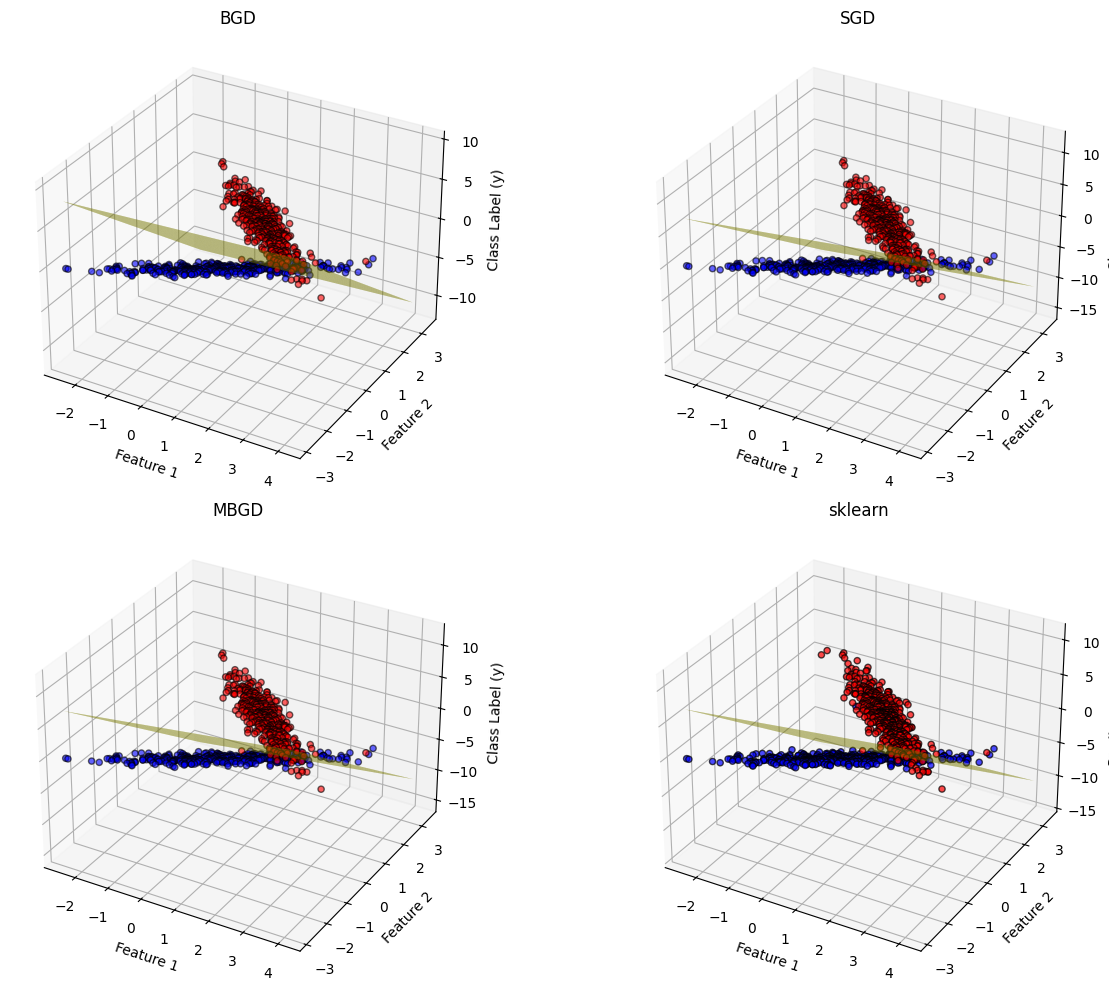

In [32]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10), subplot_kw={'projection': '3d'})

# Plot 3D decision planes using different W values
plot3D(W_cBGD, X_ctrain, y_ctrain, axes[0, 0], "BGD")
plot3D(W_cSGD, X_ctrain, y_ctrain, axes[0, 1], "SGD")
plot3D(W_cMBGD, X_ctrain, y_ctrain, axes[1, 0], "MBGD")

# Logistic Regression Decision Plane
x1_range = np.linspace(X_class[:, 0].min(), X_class[:, 0].max(), 100)
x2_range = np.linspace(X_class[:, 1].min(), X_class[:, 1].max(), 100)
X1, X2 = np.meshgrid(x1_range, x2_range)

W1_lr, W2_lr = lg.coef_[0]
b_lr = lg.intercept_[0]
Z_lr = -(W1_lr * X1 + W2_lr * X2 + b_lr)

ax4 = axes[1, 1]
ax4.scatter(X_class[:, 0], X_class[:, 1], y_class.flatten(), c=y_class.flatten(), cmap="bwr", edgecolors="k", alpha=0.7)
ax4.plot_surface(X1, X2, Z_lr, color='yellow', alpha=0.6)

ax4.set_xlabel("Feature 1")
ax4.set_ylabel("Feature 2")
ax4.set_zlabel("Predicted Class")
ax4.set_title("sklearn")

plt.tight_layout()
plt.show()